In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

## Importing data and preproccessing for clustring 

In [2]:
df = pd.read_csv(r"C:\Users\mobin\DATASIENCE\ML PROJECTS\CLUSTERING\AGGLOMARATIVE\universities.csv")

In [4]:
df.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Univ      25 non-null     object
 1   SAT       25 non-null     int64 
 2   Top10     25 non-null     int64 
 3   Accept    25 non-null     int64 
 4   SFRatio   25 non-null     int64 
 5   Expenses  25 non-null     int64 
 6   GradRate  25 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 1.5+ KB


In [7]:
df.drop('Univ', axis = 1 , inplace = True)

In [8]:
df.head(1)

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,1310,89,22,13,22704,94


## Normalizing the data

In [6]:
from sklearn.preprocessing import MinMaxScaler

In [9]:
scaler = MinMaxScaler()
scaler.fit_transform(df)

array([[0.74390244, 0.84722222, 0.10526316, 0.36842105, 0.25514388,
        0.9       ],
       [1.        , 1.        , 0.14473684, 0.        , 1.        ,
        0.46666667],
       [0.62195122, 0.47222222, 0.59210526, 0.15789474, 0.29746132,
        0.16666667],
       [0.74390244, 0.66666667, 0.13157895, 0.31578947, 0.41562939,
        0.7       ],
       [0.67073171, 0.76388889, 0.25      , 0.36842105, 0.23983525,
        0.76666667],
       [0.81707317, 0.84722222, 0.11842105, 0.21052632, 0.4275118 ,
        0.93333333],
       [0.75609756, 0.86111111, 0.21052632, 0.31578947, 0.41699623,
        0.93333333],
       [0.6097561 , 0.63888889, 0.13157895, 0.31578947, 0.20816096,
        0.83333333],
       [0.96341463, 0.875     , 0.        , 0.26315789, 0.56169926,
        1.        ],
       [0.73170732, 0.65277778, 0.39473684, 0.05263158, 0.91099123,
        0.66666667],
       [0.91463415, 0.91666667, 0.21052632, 0.21052632, 0.47686392,
        0.8       ],
       [0.62195122, 0

In [10]:
norm_df = pd.DataFrame(scaler.fit_transform(df) , columns = df.columns)

In [11]:
norm_df.head()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0.743902,0.847222,0.105263,0.368421,0.255144,0.900000
1,1.000000,1.000000,0.144737,0.000000,1.000000,0.466667
2,0.621951,0.472222,0.592105,0.157895,0.297461,0.166667
3,0.743902,0.666667,0.131579,0.315789,0.415629,0.700000
4,0.670732,0.763889,0.250000,0.368421,0.239835,0.766667


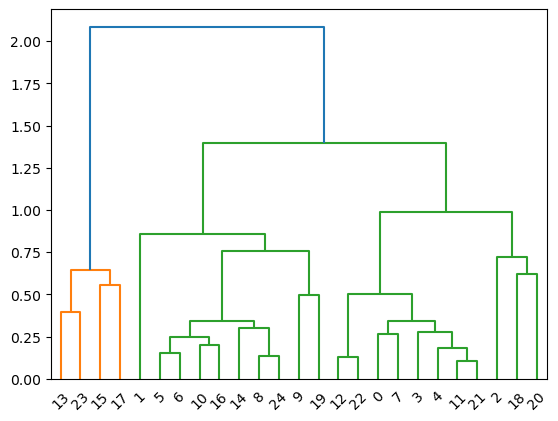

In [12]:
dandogram = sch.dendrogram(sch.linkage(norm_df , method = 'complete'))

In [18]:
hc = AgglomerativeClustering( n_clusters= 3 , metric = 'euclidean',linkage='complete',distance_threshold= None)

In [19]:
y_pred = hc.fit_predict(norm_df)

In [20]:
y_pred

array([0, 2, 0, 0, 0, 2, 2, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 1, 0, 2, 0, 0,
       0, 1, 2], dtype=int64)

In [21]:
norm_df['h_cluster'] = y_pred

In [22]:
norm_df.head()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate,h_cluster
0,0.743902,0.847222,0.105263,0.368421,0.255144,0.900000,0
1,1.000000,1.000000,0.144737,0.000000,1.000000,0.466667,2
2,0.621951,0.472222,0.592105,0.157895,0.297461,0.166667,0
3,0.743902,0.666667,0.131579,0.315789,0.415629,0.700000,0
4,0.670732,0.763889,0.250000,0.368421,0.239835,0.766667,0


In [23]:
norm_df.groupby('h_cluster').mean()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
h_cluster,,,,,,
0,0.621951,0.705808,0.331340,0.358852,0.232234,0.687879
1,0.137805,0.149306,0.736842,0.697368,0.022762,0.158333
2,0.854878,0.847222,0.169737,0.210526,0.586707,0.823333
